# An analysis of collaboration at CHIIR

We look at authorship and co-authorship of papers published at CHIIR in the period 2016-2022.

Questions:
- What is the distribution of the number of CHIIR papers per author?
- What is the distribution of the number of co-authors per author?
- How are paper focus areas related to collaboration?
- How are research design types and methods related to collaboration?

In [274]:
import seaborn as sns
import pandas as pd

# Set a readable theme
sns.set_theme(style="whitegrid", palette="colorblind")


In [118]:
citation_file = '../data/codes/all-data.one-hot.tsv'

df = pd.read_csv(citation_file, sep='\t')
df.head(2)

,zotero_ID,DOI,authors,title,year,type,pages,codes,keywords,abstract,...,user_issue_trust,user_issue_memory,user_issue_information_behavior,user_issue_distraction,user_issue_user_behavior,user_issue_serendipity,user_group_disabilities,user_group_children,user_group_older_people,user_group_LGBTQ+
0,52L8KDC2,10.1145/3176349.3176875,"Liu, Jingjing; Li, Yuan",Supporting Information Task Accomplishment: He...,2018,short,253-256,completed; design;method;questionnaire; design...,helpful system features; task accomplishment; ...,We investigated systems and their features tha...,...,0,0,0,0,0,0,0,0,0,0
1,DU9F4HUL,10.1145/3020165.3022130,"Jachja, Tiffany; Douglas, Oard W.",Goal-Directed Information Seeking in Time-Sync...,2017,short,269-272,completed; data;re-use;Apollo program resource...,apollo archive explorer; content linking; time...,We live in an era in which ubiquitous networks...,...,0,0,0,0,0,0,0,0,0,0


In [119]:
df.shape

(355, 172)

In [182]:
# select the research design type columns
type_cols = [col for col in df.columns if col.startswith('design_type')]
df[type_cols]

,design_type_experimental,design_type_resource_paper,design_type_theoretical
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
350,1,0,0
351,1,0,0
352,1,0,0
353,1,0,0


### Making the paper/author matrix

We want a matrix with one row per paper and author combination.

In [183]:
def parse_author_string(author_string):
    author_string = author_string.strip('.')
    if ' and ' not in author_string:
        # should be single author
        return author_string
    head, last_author = author_string.split(' and ')
    head_authors = head.strip(',').split(', ')
    return head_authors + [last_author]
    

def parse_author(author_string):
    authors = author_string.strip(';').split('; ')
    return authors
    

df.authors.str.split('; ').explode('authors')
#df['author'] = df['Reference author_string'].apply(parse_author_string)
df['author'] = df['authors'].apply(parse_author)
author_df = df.explode('author')[['DOI', 'year', 'author'] + type_cols]
author_df

,DOI,year,author,design_type_experimental,design_type_resource_paper,design_type_theoretical
0,10.1145/3176349.3176875,2018,"Liu, Jingjing",1,0,0
0,10.1145/3176349.3176875,2018,"Li, Yuan",1,0,0
1,10.1145/3020165.3022130,2017,"Jachja, Tiffany",1,0,0
1,10.1145/3020165.3022130,2017,"Douglas, Oard W.",1,0,0
2,10.1145/3020165.3020178,2017,"Hoeber, Orland",1,0,0
...,...,...,...,...,...,...
352,10.1145/3020165.3022126,2017,"Fu, Hengyi",1,0,0
353,10.1145/3020165.3022125,2017,"Inthiran, Anushia",1,0,0
354,10.1145/3020165.3020171,2017,"Htun, Nyi Nyi",1,1,0
354,10.1145/3020165.3020171,2017,"Halvey, Martin",1,1,0


In [122]:
print('Number of distinct authors:', author_df.author.nunique())

print('Number of papers per author:')
author_df.author.value_counts()

Number of distinct authors: 742
Number of papers per author:


Shah, Chirag            18
Capra, Rob              15
McKay, Dana             12
Arguello, Jaime         11
Hienert, Daniel          9
                        ..
Beznosov, Konstantin     1
Gomes, Sebastian         1
Benham, Rodger           1
Mackenzie, Joel          1
Inthiran, Anushia        1
Name: author, Length: 742, dtype: int64

**Sanity check**: this should give the same distribution as Toine's notebook (http://www.toinebogers.com/content/resources/code-analysis.html#authorship-collaboration)

**Question**:
- What is the distribution of the number of papers per author?

In [276]:
s = author_df.DOI.value_counts()
s.value_counts().sort_index()

1      17
2      93
3     101
4      73
5      38
6      20
7       8
8       2
9       1
11      1
12      1
Name: DOI, dtype: int64

In [279]:
# also look at descriptive statistics. What are e.g. the mean, median and spread?
s.describe()

count    355.000000
mean       3.414085
std        1.562384
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       12.000000
Name: DOI, dtype: float64

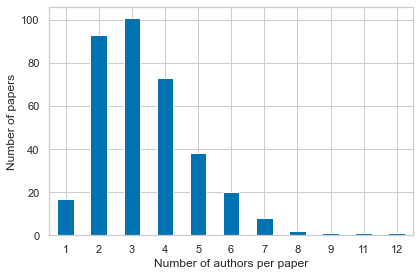

In [126]:
ax = s.value_counts().sort_index().plot(kind='bar', rot=0);

ax.set_xlabel('Number of authors per paper');
ax.set_ylabel('Number of papers');

ax.figure.tight_layout()
ax.figure.savefig('../images/collaboration-authors-per-paper-dist.png', dpi=300)


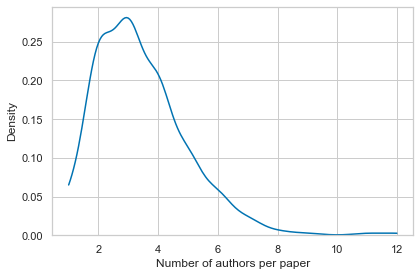

In [280]:
# Distribution as a kernel density estimation:
# - what is the probability of a paper having X authors?

num_authors = author_df.DOI.value_counts().reset_index().rename(columns={'DOI': 'Number of authors'})
ax = sns.kdeplot(data=num_authors, x='Number of authors', cut=0);

ax.set_xlabel('Number of authors per paper');
#ax.set_ylabel('Number of papers');

ax.figure.tight_layout()
ax.figure.savefig('../images/collaboration-authors-per-paper-dist.png', dpi=300)


# Distribution of number of authors per paper per year

In [281]:
g = author_df.groupby(['year']).DOI.value_counts()
g = g.to_frame().rename(columns={'DOI': 'Number of authors'}).reset_index().drop('DOI', axis=1)
g

,year,Number of authors
0,2016,7
1,2016,7
2,2016,6
3,2016,5
4,2016,5
...,...,...
350,2022,2
351,2022,2
352,2022,2
353,2022,2


First, we look at probability density:

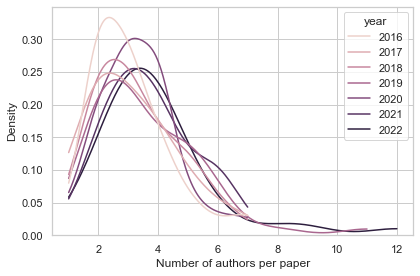

In [227]:
ax = sns.kdeplot(data=g, x='Number of authors', hue='year', common_norm=False, cut=0);
ax.set_xlabel('Number of authors per paper');
#ax.set_ylabel('Number of papers');

ax.figure.tight_layout()
ax.figure.savefig('../images/collaboration-authors-per-paper-year-dist.png', dpi=300)


There seem to be differences. Can we make them clearer using e.g. a violin plot?

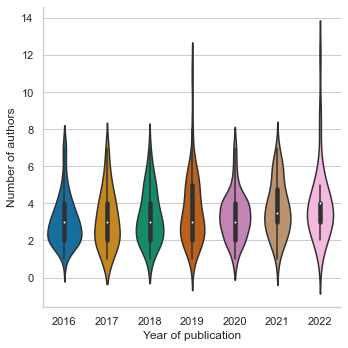

In [285]:
grid = sns.catplot(data=g, y="Number of authors", x="year", kind="violin");

grid.ax.set_xlabel('Year of publication');
grid.figure.tight_layout();
grid.figure.savefig('../images/collaboration-authors-per-paper-year-dist.png', dpi=300)


Finally, a regression suggests the trend is upwards, very slightly.


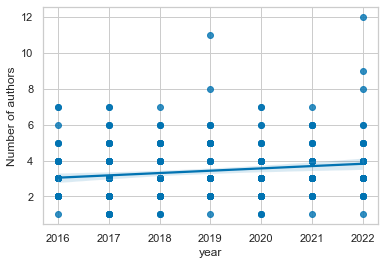

In [283]:
sns.regplot(data=g, x='year', y='Number of authors', logx=True, x_ci='sd');

Some attempt at adding a Poisson regression analysis.

In [175]:
X = (author_df
    .groupby(['year'])[["DOI"]]
    .value_counts()
    .reset_index(name='num_authors').drop('DOI', axis=1)
    #.pipe(pd.get_dummies, columns=['year'])
    .assign(intercept=1)  # Adds a column called 'intercept' with all values equal to 1.
    .sort_values(by='num_authors')
    .reset_index(drop=True)
)

y = X.pop("num_authors")
y
X
#author_df.groupby(['year'])[["DOI"]].value_counts().reset_index(name='num_authors').drop('DOI', axis=1).pipe(pd.get_dummies, columns=['year']).assign(intercept=1)

,year,intercept
0,2022,1
1,2016,1
2,2017,1
3,2017,1
4,2017,1
...,...,...
350,2019,1
351,2022,1
352,2022,1
353,2019,1


In [272]:
import statsmodels.api as sm
import numpy as np

model_no_indicators = sm.GLM(
    y,
    X["intercept"],
    offset=np.log(X["year"]-2015),
    family=sm.families.Poisson(),
)
result_no_indicators = model_no_indicators.fit()
print(result_no_indicators.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            num_authors   No. Observations:                  355
Model:                            GLM   Df Residuals:                      354
Model Family:                 Poisson   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -800.96
Date:                Tue, 25 Oct 2022   Deviance:                       527.87
Time:                        10:41:37   Pearson chi2:                     734.
No. Iterations:                     5   Pseudo R-squ. (CS):         -6.661e-16
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1233      0.029     -4.291      0.0

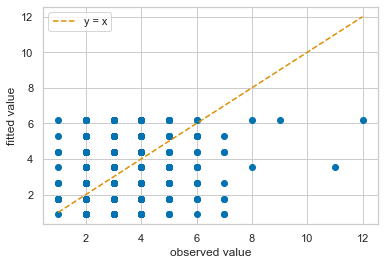

In [273]:
plt.plot(y, result_no_indicators.fittedvalues, 'o')
plt.plot(y, y, '--', label='y = x')
plt.ylabel("fitted value")
plt.xlabel("observed value")
plt.legend()
plt.show()

In [ ]:
import statsmodels.api as sm
import numpy as np

model_no_indicators = sm.GLM(
    y,
    X["intercept"],
    offset=np.log(X["year"]),
    family=sm.families.Poisson(),
)
result_no_indicators = model_no_indicators.fit()
print(result_no_indicators.summary())

model_with_ethnicity = sm.GLM(
    y,
    X[['intercept', 'eth_2', 'eth_3']],
    offset=np.log(X["past.arrests"]),
    family=sm.families.Poisson(),
)
result_with_ethnicity = model_with_ethnicity.fit()
print(result_with_ethnicity.summary())

# Number of authors and research design type

**Question**:
- How is the number of authors per paper related to the research design type(s) used?

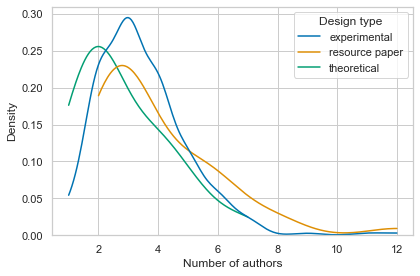

In [211]:
type_author_counts = {}
for type_col in type_cols:
    type_author_counts[type_col] = author_df[author_df[type_col] == 1].DOI.value_counts()
    
    
type_num_authors = pd.DataFrame(data=type_author_counts)
type_num_authors = type_num_authors.melt().dropna()
type_num_authors['Design type'] = type_num_authors.variable.apply(lambda x: x.replace('design_type_', '').replace('_', ' '))
ax = sns.kdeplot(data=type_num_authors, x='value', hue='Design type', common_norm=False, cut=0);

ax.set_xlabel('Number of authors');
ax.figure.tight_layout()
ax.figure.savefig('../images/collaboration-authors-per-paper-design-type-dist.png', dpi=300)


In [221]:
g.groupby('year')['Number of authors'].value_counts().swaplevel(0,1).unstack().fillna(0.0)
#.plot()

year,2016,2017,2018,2019,2020,2021,2022
Number of authors,,,,,,,
1,1.0,7.0,3.0,1.0,3.0,1.0,1.0
2,19.0,17.0,15.0,15.0,14.0,7.0,6.0
3,15.0,14.0,14.0,13.0,20.0,11.0,14.0
4,8.0,11.0,8.0,6.0,19.0,9.0,12.0
5,3.0,6.0,7.0,9.0,4.0,4.0,5.0
6,1.0,3.0,3.0,4.0,2.0,5.0,2.0
7,2.0,2.0,1.0,0.0,2.0,1.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [105]:
g2 = g.groupby('year')['Number of authors'].value_counts().to_frame().rename(columns={'Number of authors': 'Freq'}).reset_index()

g.groupby('year')['Number of authors'].describe()


,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2016,49.0,3.081633,1.320302,1.0,2.0,3.0,4.00,7.0
2017,60.0,3.150000,1.527433,1.0,2.0,3.0,4.00,7.0
2018,51.0,3.274510,1.429384,1.0,2.0,3.0,4.00,7.0
2019,50.0,3.640000,1.837923,1.0,2.0,3.0,5.00,11.0
2020,64.0,3.328125,1.285508,1.0,2.0,3.0,4.00,7.0
2021,38.0,3.710526,1.450217,1.0,3.0,3.5,4.75,7.0
2022,43.0,3.930233,1.980805,1.0,3.0,4.0,4.00,12.0


# Co-authors and co-author network

**Question**:
- What is the distribution of the number of co-authors per author?

In [287]:
# create a dataframe with one column per author
doi_author = pd.get_dummies(data=author_df[['DOI', 'author']], columns=['author'], prefix='', prefix_sep='')
# group papers per authors
doi_author = doi_author.groupby('DOI').sum()
# do a matrix multiplication to get the author adjacency matrix showing co-authorship counts
author_cooc = doi_author.T.dot(doi_author)
author_cooc

,"Abbas, Fakhri","Abela, Charlie","Abualsaud, Mustafa","Agichtein, Eugene","Ahmadvand, Ali","Ai, Qingyao","Aigner, Johannes","Aker, Ahmet","Al-Doulat, Ahmad","Al-Harbi, Aiman L.",...,"den Hengst, Floris","ter Hoeve, Maartje","van Gennip, Doménique","van Gerwen, Emile","van Ossenbruggen, Jacco","van Zeelt, Mickey","van den Bosch, Antal","van den Hoven, Elise","van der Vaart, Merel","von Hoyer, Johannes"
"Abbas, Fakhri",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Abela, Charlie",0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Abualsaud, Mustafa",0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Agichtein, Eugene",0,0,0,6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Ahmadvand, Ali",0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"van Zeelt, Mickey",0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
"van den Bosch, Antal",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
"van den Hoven, Elise",0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
"van der Vaart, Merel",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [229]:
s = author_cooc.sum().sort_values(ascending=False).value_counts()
s = s.sort_index()
author_cooc.sum().sort_values(ascending=False).describe()

count    742.000000
mean       6.741240
std        6.067359
min        1.000000
25%        3.000000
50%        5.000000
75%        7.000000
max       53.000000
dtype: float64

Plot a kernel density estimation for the number of co-authors per author.

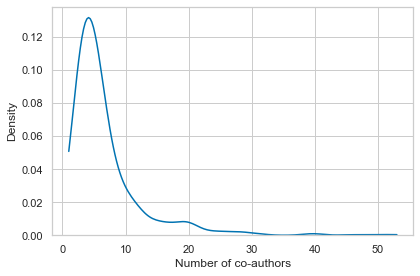

In [239]:
num_cooc = author_cooc.sum().reset_index(name='Number of co-authors')
#sns.kdeplot(data=num_cooc, x='Number of co-authors', cut=0, log_scale=True);
ax = sns.kdeplot(data=num_cooc, x='Number of co-authors', cut=0);
ax.set_xlabel('Number of co-authors');


ax.figure.tight_layout()
ax.figure.savefig('../images/collaboration-co-authors-per-author-dist.png')


## Co-author Network Analysis

**Question**:
- How connected is the CHIIR community in terms of co-authorship?


In [289]:
import networkx as nx

G = nx.from_pandas_adjacency(author_cooc)
print(G)

Graph with 742 nodes and 2352 edges


In [293]:
# How large is each component of co-authors?
cumu_authors = 0
for ci, cc in enumerate(sorted(nx.connected_components(G), key = lambda x: len(x), reverse=True)):
    cumu_authors += len(cc)
    print(f'Compenent {ci+1} has {len(cc)} authors, {cumu_authors} in the first {ci+1} components')

Compenent 1 has 244 authors, 244 in the first 1 components
Compenent 2 has 40 authors, 284 in the first 2 components
Compenent 3 has 39 authors, 323 in the first 3 components
Compenent 4 has 24 authors, 347 in the first 4 components
Compenent 5 has 22 authors, 369 in the first 5 components
Compenent 6 has 16 authors, 385 in the first 6 components
Compenent 7 has 16 authors, 401 in the first 7 components
Compenent 8 has 13 authors, 414 in the first 8 components
Compenent 9 has 13 authors, 427 in the first 9 components
Compenent 10 has 12 authors, 439 in the first 10 components
Compenent 11 has 11 authors, 450 in the first 11 components
Compenent 12 has 10 authors, 460 in the first 12 components
Compenent 13 has 9 authors, 469 in the first 13 components
Compenent 14 has 9 authors, 478 in the first 14 components
Compenent 15 has 8 authors, 486 in the first 15 components
Compenent 16 has 7 authors, 493 in the first 16 components
Compenent 17 has 7 authors, 500 in the first 17 components
Co

In [85]:
from bokeh.io import output_file, show
from bokeh.plotting import figure, from_networkx

width = 2
ax_range=(-width, width)
plot = figure(title="Networkx Integration Demonstration", x_range=ax_range, y_range=ax_range,
              tools="", toolbar_location=None)

graph = from_networkx(G, nx.spring_layout, scale=2, center=(0,0))
plot.renderers.append(graph)

output_file("networkx_graph.html")
show(plot)


# Transforming author information to Web of Science format

The output of this step serves as input for VOS viewer.

In [266]:
from collections import defaultdict
from unidecode import unidecode

author_dict = author_df.to_dict()
web_of_science_dict = defaultdict(list)

for row_id, row in author_df.iterrows():
    author = row['author'].encode('ascii', 'ignore')
    author = unidecode(row['author'])
    web_of_science_dict[row['DOI']].append(author)

web_of_science_dict

with open('../data/CHIIR-authors-WoS.txt', 'wt') as fh:
    for doi in web_of_science_dict:
        doi_string = 'AF'
        for ai, author in enumerate(web_of_science_dict[doi]):
            if ai == 0:
                doi_string += f' {author}\n'
            else:
                doi_string += f'    {author}\n'
        doi_string += f'UT {doi}\nER\n\n'
        fh.write(doi_string)
        print(doi, web_of_science_dict[doi])
        print(doi_string)
        print()

10.1145/3176349.3176875 ['Liu, Jingjing', 'Li, Yuan']
AF Liu, Jingjing
    Li, Yuan
UT 10.1145/3176349.3176875
ER



10.1145/3020165.3022130 ['Jachja, Tiffany', 'Douglas, Oard W.']
AF Jachja, Tiffany
    Douglas, Oard W.
UT 10.1145/3020165.3022130
ER



10.1145/3020165.3020178 ['Hoeber, Orland', 'Sarkar, Anoop', 'Vacariu, Andrei', 'Whitney, Max', 'Gaikwad, Manali', 'Kaur, Gursimran']
AF Hoeber, Orland
    Sarkar, Anoop
    Vacariu, Andrei
    Whitney, Max
    Gaikwad, Manali
    Kaur, Gursimran
UT 10.1145/3020165.3020178
ER



10.1145/2854946.2855001 ['Ghosh, Debanjan']
AF Ghosh, Debanjan
UT 10.1145/2854946.2855001
ER



10.1145/2854946.2854958 ['Sarrafzadeh, Bahareh', 'Vtyurina, Alexandra', 'Lank, Edward', 'Vechtomova, Olga']
AF Sarrafzadeh, Bahareh
    Vtyurina, Alexandra
    Lank, Edward
    Vechtomova, Olga
UT 10.1145/2854946.2854958
ER



10.1145/3020165.3020172 ['Htun, Nyi Nyi', 'Halvey, Martin', 'Baillie, Lynne']
AF Htun, Nyi Nyi
    Halvey, Martin
    Baillie, Lynne
UT 10.1145/

In [249]:
for row_id in range(0, len(author_df) - 1):
    print(row_id)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27